In [ ]:
#https://stackoverflow.com/questions/35388271/how-to-handle-errors-in-tkinter-mainloop
#https://pythonprogramming.net/
class TkErrorCatcher:

    def __init__(self, func, subst, widget):
        self.func = func
        self.subst = subst
        self.widget = widget

    def __call__(self, *args):
        try:
            if self.subst:
                args = self.subst(*args)
            return self.func(*args)
        except SystemExit as msg:
            raise SystemExit(msg)
        except Exception as err:
            raise err

import tkinter as tk
from tkinter import filedialog, PhotoImage, colorchooser, simpledialog, ttk
import os, importlib, matplotlib, pandas as pd, numpy as np, matplotlib.pyplot as plt
import time
from PIL import ImageTk, Image, ImageDraw, ImageColor, ImageFilter, ImageFont
import webbrowser
import brainplot
brainplot.initialization()
tk.CallWrapper = TkErrorCatcher
dirpath = os.getcwd()

#orange
#app_colors={'color0': '#ffe0cc', 'color1':'#ffc299', 'color2':'#ffa366', 'color3':'#ff8533', 'color4':'#ff6600',
 #           'color5':'#cc5200'}

#blue
#app_colors={'color0': '#b3ffff', 'color1':'#80ffff', 'color2':'#00ffff', 'color3':'#00e6e6', 'color4':'#00cccc',
 #           'color5':'#009999'}


#green
app_colors={'color0': '#e6ffe6', 'color1':'#b3ffb3', 'color2':'#80ff80', 'color3':'#4dff4d', 'color4':'#00ff00',
            'color5':'#00cc00'}


#yellow
#app_colors={'color0': '#ffffe6', 'color1':'#ffffb3', 'color2':'#ffff80', 'color3':'#ffff4d', 'color4':'#ffff1a',
 #           'color5':'#e6e600'}

#indigo
#app_colors={'color0': '#f2f2f2', 'color1':'#dfe2fe', 'color2':'#b1cbfa', 'color3':'#8e98f5', 'color4':'#7874f2', 
 #           'color5':'#6730ec'}
#gray
colors_layer1={'color0': '#aaaaaa', 'color1':'#bbbbbb', 'color2':'#cccccc', 'color3':'#dddddd', 'color4':'#cccccc', 'color5':'#aaaaaa'}


#indigo
#colors_layer1={'color0': '#f2f2f2', 'color1':'#dfe2fe', 'color2':'#b1cbfa', 'color3':'#8e98f5', 'color4':'#7874f2', 
 #           'color5':'#6730ec'}

global status, animal
status1='Species: not selected'
status2= 'Coloring option: not selected'
status3= 'Color/colormap: not defined'
status4= 'Data file: not selected'
status5= 'Templates: not selected'
status6= 'Labels: not selected'
ref='Based on Scalable Brain Atlas by Rembrandt Bakker et al.'
class bp (tk.Tk):
    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)
        self.geometry('400x630+450+20')
        container=tk.Frame(self, bg='#33334d')
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)
        container.grid_propagate(1)
        global status_bar1, status_bar2, status_bar3, status_bar4, status_bar5, status_bar6
        status_bar1=tk.Label(container, text=status1, width=400, bd=1, bg='#33334d', fg='#cccccc', font=("System 8"), relief='sunken', justify='left', anchor='w')
        status_bar1.grid(row=100, column=0, columnspan=100, sticky='w')
        status_bar2=tk.Label(container, text=status2, width=400, bd=1, bg='#33334d', fg='#cccccc', font=("System 8"), relief='sunken', justify='left', anchor='w')
        status_bar2.grid(row=101, column=0, columnspan=100, sticky='w')
        status_bar3=tk.Label(container, text=status3, width=400, bd=1, bg='#33334d', fg='#cccccc', font=("System 8"), relief='sunken', justify='left', anchor='w')
        status_bar3.grid(row=102, column=0, columnspan=100, sticky='w')
        status_bar4=tk.Label(container, text=status4, width=400, bd=1, bg='#33334d', fg='#cccccc', font=("System 8"), relief='sunken', justify='left', anchor='w')
        status_bar4.grid(row=103, column=0, columnspan=100, sticky='w')
        status_bar5=tk.Label(container, text=status5, width=400, bd=1, bg='#33334d', fg='#cccccc', font=("System 8"), relief='sunken', justify='left', anchor='w')
        status_bar5.grid(row=104, column=0, columnspan=100, sticky='w')
        status_bar6=tk.Label(container, text=status6, width=400, bd=1, bg='#33334d', fg='#cccccc', font=("System 8"), relief='sunken', justify='left', anchor='w')
        status_bar6.grid(row=105, column=0, columnspan=100, sticky='w')
        help_button = tk.Label(container, text='Help', width=400, bd=1, bg='#aaaaaa', fg='#393e46',
                               relief='sunken', anchor='e')
        help_button.bind("<Button-1>", lambda e: webbrowser.open_new("https://github.com/lkondratova/Brainplot/blob/master/README.md"))
        help_button.grid(row=109, column = 0, columnspan=100, sticky='e')

        reference=tk.Label(container, width=400, text=ref, bd=0, bg='#aaaaaa', fg='#393e46', 
                           relief='sunken', anchor='e')
        reference.bind("<Button-1>", lambda e: webbrowser.open_new("https://scalablebrainatlas.incf.org"))
        reference.grid(row=110, column = 0, columnspan=100, sticky='e')
        self.frames={}
        
        for F in (StartPage, PageOne, PageTwo, PageThree, PageFour, PageFive, PageSix):
            frame=F(container, self)
            self.frames[F] = frame
            frame.grid(row=0, column=0, sticky='nsew')
        self.show_frame(StartPage)
        
    def show_frame(self, cont):
        frame=self.frames[cont]
        frame.tkraise()
    
        
class StartPage(tk.Frame):
    def __init__ (self, parent, controller):
        tk.Frame.__init__(self,parent, bg='#33334d')
        btn0=tk.Button(self, text='SELECT SPECIES', font=("System 15 bold"), pady=15,
               bg=app_colors['color0'], bd=0, padx=0, command=lambda:controller.show_frame(PageOne))
        btn0.pack(fill='both')
        btn1=tk.Button(self, text='COLORING OPTIONS', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, state='disabled')
        btn1.pack(fill='both')

        btn2=tk.Button(self, text='DATA FILE', font=("System 15 bold"), pady=15,
               bg=app_colors['color2'], bd=0, padx=0, state='disabled')
        btn2.pack(fill='both')

        btn3=tk.Button(self, text='CHOOSE TEMPLATES', font=("System 15 bold"), pady=15,
               bg=app_colors['color3'], bd=0, padx=0, state='disabled')
        btn3.pack(fill='both')

        btn4=tk.Button(self, text='CHOOSE LABELS', font=("System 15 bold"), pady=15,
               bg=app_colors['color4'], bd=0, padx=0, state='disabled')
        btn4.pack(fill='both')

        btn5=tk.Button(self, text='RUN', font=("System 15 bold"), pady=15,
               bg=app_colors['color5'], bd=0, padx=0, state='disabled')
        btn5.pack(fill='both')
        
#species selection
class PageOne(tk.Frame):
    
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#33334d')
        btn0=tk.Button(self, text='SELECT SPECIES', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, command=lambda:controller.show_frame(StartPage))
        btn0.pack(fill='both')
        def sp_selection(sp):
            species=['macaque', 'mouse_allen', 'mouse', 'rat', 'human', 'ferret', 'opossum']
            global animal,status1, status_bar1
            controller.show_frame(PageTwo)
            #btn1.config(state='active')
            animal = species[sp]
            status1='Species: '+animal
            status_bar1.config(text=status1, bg='#4747d1')
        btn11=tk.Button(self, text='Macaque', font=("System 15 bold"),
               bg=colors_layer1['color0'], bd=0, padx=0, command=lambda: sp_selection(0))
        btn11.pack(fill='both')
        btn12=tk.Button(self, text='Mouse Allen', font=("System 15 bold"),
               bg=colors_layer1['color1'], bd=0, padx=0, command=lambda: sp_selection(1))
        btn12.pack(fill='both')
        btn13=tk.Button(self, text='Mouse', font=("System 15 bold"),
               bg=colors_layer1['color2'], bd=0, padx=0, command=lambda: sp_selection(2))
        btn13.pack(fill='both')
        btn14=tk.Button(self, text='Rat', font=("System 15 bold"),
               bg=colors_layer1['color3'], bd=0, padx=0, command=lambda: sp_selection(3))
        btn14.pack(fill='both')
        btn15=tk.Button(self, text='Human', font=("System 15 bold"),
               bg=colors_layer1['color4'], bd=0, padx=0, command=lambda: sp_selection(4))
        btn15.pack(fill='both')
        btn16=tk.Button(self, text='Ferret', font=("System 15 bold"),
               bg=colors_layer1['color5'], bd=0, padx=0, command=lambda: sp_selection(5))
        btn16.pack(fill='both')
        btn17=tk.Button(self, text='Opossum', font=("System 15 bold"),
               bg=colors_layer1['color1'], bd=0, padx=0, command=lambda: sp_selection(6))
        btn17.pack(fill='both')
        btn1=tk.Button(self, text='COLORING OPTIONS', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, state='disabled')
        btn1.pack(fill='both')
        btn2=tk.Button(self, text='DATA FILE', font=("System 15 bold"), pady=15,
               bg=app_colors['color2'], bd=0, padx=0, state='disabled')
        btn2.pack(fill='both')
        btn3=tk.Button(self, text='CHOOSE TEMPLATES', font=("System 15 bold"), pady=15,
               bg=app_colors['color3'], bd=0, padx=0, state='disabled')
        btn3.pack(fill='both')
        btn4=tk.Button(self, text='CHOOSE LABELS', font=("System 15 bold"), pady=15,
               bg=app_colors['color4'], bd=0, padx=0, state='disabled')
        btn4.pack(fill='both')
        btn5=tk.Button(self, text='RUN', font=("System 15 bold"), pady=15,
               bg=app_colors['color5'], bd=0, padx=0, state='disabled')
        btn5.pack(fill='both')


def open_colormap():
        global newWindow, im
        newWindow = tk.Toplevel()
        newWindow.title('Available matplotlib colormaps. Visit Matplotlib site to check on updates.')
        #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
        im=ImageTk.PhotoImage(Image.open('colormaps.png'))
        cmps_label=tk.Label(newWindow, image=im)
        cmps_label.pack()

#function selection       
class PageTwo(tk.Button): 
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#33334d')
        tk.Grid.columnconfigure(self, 0, weight=1)
        tk.Grid.columnconfigure(self, 1, weight=1)
        btn0=tk.Button(self, text='SELECT SPECIES', font=("System 15 bold"), pady=15,
               bg=app_colors['color0'], bd=0, padx=0, command=lambda:controller.show_frame(PageOne))
        btn0.grid(row=0, column=0, columnspan=2, sticky='nsew')
        
        btn1=tk.Button(self, text='COLORING OPTIONS', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, command=lambda:controller.show_frame(PageTwo))
        btn1.grid(row=1, column=0, columnspan=2, sticky='nsew')
        def color_picker():
            global color, function
            function = 'create_label'
            color = []
            col=colorchooser.askcolor(title='Select a color')
            if col[0]!=None:
                for i in range(3):
                    color.append(int(col[0][i]))
            else:
                color=[255, 0, 0]
            transp=int
            transp = simpledialog.askstring(title="Set up transparency",
                                            prompt="Enter transparency level from 0 (transparent) to 255 (opaque):")
            if transp!=None:
                if transp.isnumeric():
                    color.append(int(transp))
                else:
                    color.append(255)
                    controller.show_frame(PageFour)
                    status4 = 'Data file: N/A'
                    status_bar4.config(text=status4, bg='#4747d1')
            else:
                color.append(255)
                controller.show_frame(PageFour)
                
            status4 = 'Data file: N/A'
            status_bar4.config(text=status4, bg='#4747d1')
            status2='Coloring option: '+function
            status3='Color/colormap: '+str(color)
            status_bar2.config(text=status2, bg='#4747d1')
            status_bar3.config(text=status3, bg='#4747d1')
        btn21=tk.Button(self, text='Create labels', font=("System 15 bold"),
               bg=colors_layer1['color0'], bd=0, padx=0, command=color_picker)
        btn21.grid(row=2, column=0,columnspan=2, sticky='nsew')
        
        
        def enter_colormap():
            global colormap, e, function, label, btn212, btn211
            if e.get()!=None and len(e.get())>0:
                colormap=e.get()
            else:
                colormap='viridis'
            status2='Coloring option: '+function
            status3='Color/colormap: '+str(colormap)
            status_bar2.config(text=status2, bg='#4747d1')
            status_bar3.config(text=status3, bg='#4747d1')
            btn211.destroy()
            label.destroy()
            btn212.destroy()
            e.destroy()
            controller.show_frame(PageThree)
        def define_colormap(f, row):
            global colormap, function, label, btn212, btn211, e
            function = f
            #status='Species: '+animal+ ' \nColoring option: '+function+' \nColor/colormap: '+str(colormap)+ '\nData file: not selected \nTemplates: not selected \nLabels: not selected'
            #status_bar.config(text=status)
            btn211=tk.Button(self, text='(See matplotlib colormaps)', font=("System 13"), bd=0, padx=15,bg='#33334d', 
                             command=open_colormap)
            btn211.grid(row=row+1, column=0, sticky='w')
            global e
            label=tk.Label(self, text="Enter colormap: ", bg='#33334d', fg='#ffffff', pady=20, font=("System 13"))
            label.grid(row=row,column=0)
            e=tk.Entry(self)
            e.grid(row=row, column=1)
            btn212=tk.Button(self, text="Save colormap", bg='#33334a', fg='#ffffff', font=("System 15 bold"), bd=2, padx=15,
                             command=enter_colormap)
            btn212.grid(row=row+1, column=1, sticky='nsew') 
            
            
        btn22=tk.Button(self, text='Full/colormap', font=("System 15 bold"),
               bg=colors_layer1['color1'], bd=0, padx=0, command=lambda: define_colormap('whole_colormap', 4))
        btn22.grid(row=3, column=0, columnspan=2, sticky='nsew')
        def one_color_picker():
            global color, function
            function = 'whole_one_color'
            color = []
            col = colorchooser.askcolor(title='Select a color')
            if col[0]!=None:
                for i in range(3):
                    color.append(int(col[0][i]))
            else:
                color=[0, 255, 0]
            status2='Coloring option: '+function
            status3='Color/colormap: '+str(color)
            status_bar2.config(text=status2, bg='#4747d1')
            status_bar3.config(text=status3, bg='#4747d1')
            controller.show_frame(PageThree)

        btn23=tk.Button(self, text='Full/one color', font=("System 15 bold"),
               bg=colors_layer1['color2'], bd=0, padx=0, command=one_color_picker)
        btn23.grid(row=10, column=0, columnspan=2, sticky='nsew')
        btn24=tk.Button(self, text='Two-sided/colormap', font=("System 15 bold"),
               bg=colors_layer1['color3'], bd=0, padx=0, command=lambda: define_colormap('two_sided_colormap',12))
        btn24.grid(row=11, column=0, columnspan=2, sticky='nsew')
        
        def two_colors_picker():
            global color1, color2, function
            function='two_sided_one_color'
            color1 = []
            color2 = []
            col = colorchooser.askcolor(title='Select a color for the left part')
            if col[0]!=None:
                for i in range(3):
                    color1.append(int(col[0][i]))
            else:
                color1=[255, 120, 0]
            col2 = colorchooser.askcolor(title='Select a color for the right part')
            if col2[0]!=None:
                for i in range(3):
                    color2.append(int(col2[0][i]))
            else:
                color2=[0, 0, 255]
            status2='Coloring option: '+function
            status3='Color/colormap: '+str(color1)+'&'+str(color2)
            status_bar2.config(text=status2, bg='#4747d1')
            status_bar3.config(text=status3, bg='#4747d1')
            controller.show_frame(PageThree)

        btn25=tk.Button(self, text='Two-sided/one color', font=("System 15 bold"),
               bg=colors_layer1['color4'], bd=0, padx=0, command=two_colors_picker)
        btn25.grid(row=24, column=0,columnspan=2, sticky='nsew')
        btn2=tk.Button(self, text='DATA FILE', font=("System 15 bold"), pady=15,
               bg=app_colors['color2'], bd=0, padx=0, state='disabled')
        btn2.grid(row=25, column=0, columnspan=2, sticky='nsew')

        btn3=tk.Button(self, text='CHOOSE TEMPLATES', font=("System 15 bold"), pady=15,
               bg=app_colors['color3'], bd=0, padx=0, state='disabled')
        btn3.grid(row=26, column=0, columnspan=2, sticky='nsew')

        btn4=tk.Button(self, text='CHOOSE LABELS', font=("System 15 bold"), pady=15,
               bg=app_colors['color4'], bd=0, padx=0, state='disabled')
        btn4.grid(row=27, column=0, columnspan=2, sticky='nsew')

        btn5=tk.Button(self, text='RUN', font=("System 15 bold"), pady=15,
               bg=app_colors['color5'], bd=0, padx=0, state='disabled')
        btn5.grid(row=28, column=0, columnspan=2, sticky='nsew')
class PageThree(tk.Frame):  
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#33334d')
        btn0=tk.Button(self, text='SELECT SPECIES', font=("System 15 bold"), pady=15,
               bg=app_colors['color0'], bd=0, padx=0, command=lambda:controller.show_frame(PageOne))
        btn0.pack(fill='both')
        
        btn1=tk.Button(self, text='COLORING OPTIONS', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, command=lambda:controller.show_frame(PageTwo))
        btn1.pack(fill='both')
        def open_data_file():
            global function, data_dirpath, data_dirpath1, data_dirpath2, btn2, btn3
            #functions whole_colormap, whole_one_color, two_sided_colormap, two_sided_one_color
            if function.startswith('whole'):
                data_dirpath=filedialog.askopenfilename(initialdir='/', title='Select a data file', filetypes=[('csv files', '.csv')])
                if len(data_dirpath)<1:
                    status4='Data file: ...not selected'
                    status_bar4.config(text=status4, bg='#33334d')
                    controller.show_frame(PageThree)
                else:
                    status4='Data file: ...'+data_dirpath[(len(data_dirpath)-20):(len(data_dirpath))]
                    status_bar4.config(text=status4, bg='#4747d1')
                    controller.show_frame(PageFour)
                
            if function.startswith('two'):
                data_dirpath1=filedialog.askopenfilename(initialdir='/', title='Select a data file for the left part', filetypes=[('csv files', '.csv')])
                data_dirpath2=filedialog.askopenfilename(initialdir='/', title='Select a data file for the right part', filetypes=[('csv files', '.csv')])
                if data_dirpath1==None or data_dirpath2==None:
                    status4='Data file: ...not selected'
                    status_bar4.config(text=status4)
                    status_bar4.config(text=status4)
                    controller.show_frame(PageThree)
                else:
                    status4='Data file: ...'+data_dirpath1[(len(data_dirpath1)-10):(len(data_dirpath1))]+' & ...'+data_dirpath2[(len(data_dirpath2)-10):(len(data_dirpath2))]
                    status_bar4.config(text=status4, bg='#4747d1')
                    controller.show_frame(PageFour)
            
            #open this file, visualize it -----------> do it upon running the app
        btn2=tk.Button(self, text='DATA FILE', font=("System 15 bold"), pady=15, bg=app_colors['color2'], bd=0, 
                       padx=0, state='normal', command=open_data_file)
        btn2.pack(fill='both')
        btn3=tk.Button(self, text='CHOOSE TEMPLATES', font=("System 15 bold"), pady=15,
               bg=app_colors['color3'], bd=0, padx=0, state='disabled', command=None)
        btn3.pack(fill='both')

        btn4=tk.Button(self, text='CHOOSE LABELS', font=("System 15 bold"), pady=15,
               bg=app_colors['color4'], bd=0, padx=0, state='disabled')
        btn4.pack(fill='both')

        btn5=tk.Button(self, text='RUN', font=("System 15 bold"), pady=15,
               bg=app_colors['color5'], bd=0, padx=0, state='disabled')
        btn5.pack(fill='both')
class PageFour(tk.Frame):  
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#33334d')
        btn0=tk.Button(self, text='SELECT SPECIES', font=("System 15 bold"), pady=15,
               bg=app_colors['color0'], bd=0, padx=0, command=lambda:controller.show_frame(PageOne))
        btn0.pack(fill='both')
        btn1=tk.Button(self, text='COLORING OPTIONS', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, command=lambda:controller.show_frame(PageTwo))
        btn1.pack(fill='both')
        def choose_templates():
            global dirpath, templates,im_buffer
            templates=[]
            im_paths=[]
            template_num=None
            template_num = simpledialog.askinteger(title='Set up a number of templates to be used',
                                            prompt="Enter the number of templates:")
            if template_num==None:
                controller.show_frame(PageThree)
            else:
                number=''
                for i in range(template_num):
                    template = filedialog.askopenfilename(initialdir=dirpath+'/template_container_'+animal+'/slice_numbers', 
                                                          title='Select a template #'+str(i+1), filetypes=[('png files', '.png')])
                    im_paths.append(template)
                    k=len(template)-5
                    number=''
                    while template[k].isnumeric():
                        number = template[k]+number
                        k=k-1
                    templates.append(int(number))
            im_buffer = []
            for i in range(len(templates)):
                with Image.open(im_paths[i]) as tem0:
                    tem=tem0.convert('RGBA')
                im_buffer.append(tem)
            status5='Templates: '+str(templates)
            status_bar5.config(text=status5, bg='#4747d1')
            controller.show_frame(PageFive)    
            
        def file_option():
            global function
            if function == 'create_label':
                pass
            else:
                print(function)
                controller.show_frame(PageThree)
                
        btn2=tk.Button(self, text='DATA FILE', font=("System 15 bold"), pady=15, 
                       bg=app_colors['color2'], bd=0, padx=0, state='normal', command=file_option)
        btn2.pack(fill='both')

        btn3=tk.Button(self, text='CHOOSE TEMPLATES', font=("System 15 bold"), 
                       pady=15, bg=app_colors['color3'], bd=0, padx=0, command=choose_templates)
        btn3.pack(fill='both')
        btn4=tk.Button(self, text='CHOOSE LABELS', font=("System 15 bold"), pady=15,
               bg=app_colors['color4'], bd=0, padx=0, state='disabled', command=None)
        btn4.pack(fill='both')

        btn5=tk.Button(self, text='RUN', font=("System 15 bold"), pady=15,
               bg=app_colors['color5'], bd=0, padx=0, state='disabled')
        btn5.pack(fill='both')
class PageFive(tk.Frame):  
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#33334d')
        btn0=tk.Button(self, text='SELECT SPECIES', font=("System 15 bold"), pady=15,
               bg=app_colors['color0'], bd=0, padx=0, command=lambda:controller.show_frame(PageOne))
        btn0.pack(fill='both')
        btn1=tk.Button(self, text='COLORING OPTIONS', font=("System 15 bold"), pady=15,
               bg=app_colors['color1'], bd=0, padx=0, command=lambda:controller.show_frame(PageTwo))
        btn1.pack(fill='both')
        btn2=tk.Button(self, text='DATA FILE', font=("System 15 bold"), pady=15, 
                       bg=app_colors['color2'], bd=0, padx=0, state='normal', command=lambda:controller.show_frame(PageThree))
        btn2.pack(fill='both')

        btn3=tk.Button(self, text='CHOOSE TEMPLATES', font=("System 15 bold"), 
                       pady=15, bg=app_colors['color3'], bd=0, padx=0, command=lambda:controller.show_frame(PageFour))
        btn3.pack(fill='both')
        
        def choose_labels():
            global labelsWindow, im, templates, template_sample, animal, names, t
            labelsWindow=None
            im=None
            for i in range(len(templates)):
                brainplot.areas_available (animal, templates, i) #{'00FF3F': ['SpC', 'spinal cord']}
                from brainplot import t as t, names as names
                w, h = im_buffer[i].size
                labelsWindow = tk.Toplevel()
                labelsWindow.iconbitmap('icon.ico')
                labelsWindow.title('Choose labels and data for the template '+str(templates[i]))
                topFrame, leftFrame, rightFrame, template_sample, label_im=(None, None, None, None, None)
                topFrame=tk.Frame(labelsWindow, width=400, height=150)
                topFrame.grid_rowconfigure(0, weight=1)
                topFrame.grid_columnconfigure(0, weight=1)
                topFrame.grid_propagate(1)
                topFrame.grid(row = 0, columnspan = 100, rowspan=2, sticky='nsew')
                leftFrame=tk.Frame(labelsWindow, width=200, height=150)
                leftFrame.grid(row=10, column=0, sticky='nsew')
                rightFrame=tk.Frame(labelsWindow, width=200, height=150)
                rightFrame.grid(row=20, column=10, sticky='nsew')
                #put the template in the tip frame
                template_sample=ImageTk.PhotoImage(im_buffer[i].resize((150,int(h/(w/150)))))
                label_im=tk.Label(topFrame, image=template_sample, relief='sunken', anchor="c")
                label_im.grid(row=0, column=0, columnspan = 100, sticky='n')
                label_t=tk.Label(topFrame, text = 'Template # '+str(t)+'('+str(templates[i])+')', anchor="c")
                label_t.grid(row=1, column=0, columnspan = 100, sticky='n')
                
                
                

                
                #im=ImageTk.PhotoImage(Image.open('colormaps.png'))
                #cmps_label=tk.Label(newWindow, image=im)
                #cmps_label.pack()
        btn4=tk.Button(self, text='CHOOSE LABELS', font=("System 15 bold"), pady=15,
               bg=app_colors['color4'], bd=0, padx=0, state='normal', command=choose_labels)
        btn4.pack(fill='both')

        btn5=tk.Button(self, text='RUN', font=("System 15 bold"), pady=15,
               bg=app_colors['color5'], bd=0, padx=0, state='disabled')
        btn5.pack(fill='both')
        
class PageSix(tk.Frame):  
    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent, bg='#33334d')
                
            
            
            
        
#create page four for templates and labels.

app = bp()
app.iconbitmap('icon.ico')
app.title('Brainplot')
app.mainloop()
  
    
        
    

Brainplot was imported successfully.


In [4]:

%reset -f

In [109]:
import brainplot
brainplot.initialization()

Brainplot was imported successfully.


In [138]:
animal = 'mouse'
templates=[20, 210, 810]

    print(names)
for i in range(len(templates)):
    areas_available (animal, templates, i)
        


[171, '00FF3F']
171
00FF3F
{'00FF3F': ['SpC', 'spinal cord']}
[133, '00FFBF', 'FF009F', '00FFDF', 'FFBF00']
133
00FFBF
FF009F
00FFDF
FFBF00
{'00FFBF': ['4V', '4th ventricle'], 'FF009F': ['[inner ear]', 'inner ear'], '00FFDF': ['Cb', 'cerebellum'], 'FFBF00': ['MO', 'medulla']}
[13, '00FFFF', 'FF9F00']
13
00FFFF
FF9F00
{'00FFFF': ['Olf', 'olfactory bulb'], 'FF9F00': ['5n', 'trigeminal']}


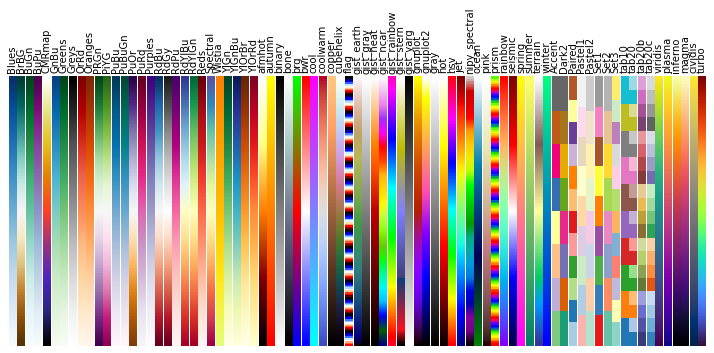

In [3]:
#https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html
from pylab import *
from numpy import outer
rc('text', usetex=False)
a=outer(arange(0,1,0.01),ones(10))
figure(figsize=(10,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'turbo']
for i in range(len(cmaps)):
    maps.append(cmaps[i])
l=len(maps)+1
for i, m in enumerate(maps):
    subplot(1,l,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,rotation=90,fontsize=10)
savefig("colormaps.png",dpi=100,facecolor='gray')